## Dual Numbers

### Addition rule
$$
h(x) = f(x) + g(x)
$$
$$
h'(x) = f'(x) + g'(x)
$$


### Product rule
$$
h(x) = f(x)*g(x)
$$

$$
h'(x) = f'(x)*g(x) + g'(x)f(x)
$$

### Quotient rule
$$
h(x) = \frac{f(x)}{g(x)}
$$
$$
h'(x) = \frac{g(x)f'(x) -f(x)g'(x)}{g(x)^2}
$$

### Chain rule
$$
f(x) = g(h(x))
$$

$$
f'(x) = g'(h(x))h'(x)
$$

Consider $f(x) = \sin(h(x))$
$$
\frac{\rm d}{\rm dx} \sin(h(x)) = \cos(h(x))\frac{\rm dh}{\rm dx}
$$

In [80]:
from math import sin, cos

class Dual(object):
    def __init__(self, x, ϵ=1):
        self.x = x
        self.ϵ = ϵ
        
    def __str__(self):
        return str(self.x) + " + " + str(self.ϵ) + "ϵ"
    
    def __mul__(self, d):
        return Dual(self.x * d.x, self.x*d.ϵ + d.x*self.ϵ)
    
    def __add__(self, d):
        return Dual(self.x + d.x, self.ϵ + d.ϵ)
    
    def __truediv__(self, d):
        return Dual(self.x/d.x, ((d.x *self.ϵ - d.ϵ * self.x )/d.x**2))
    
    def d_sin(self):
        return Dual(sin(self.x), cos(self.x)*self.ϵ)

In [83]:
# # Addition
# D=Dual(2,1) + Dual(3, 0)  ### For f(x)=x+3 @ x=2
# print(D)

# # multiplication # f(x) = (x + 3) * (x + 2) @x=2
D = (Dual(2, 1) + Dual(3, 0)) * (Dual(2,1) + Dual(2, 0)) 
print(D)

20 + 9ϵ


<div>
<img src="https://discuss.pytorch.org/uploads/default/original/2X/3/35226d9fbc661ced1c5d17e374638389178c3176.png" width="500" style="margin: 55px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
# PyTorch Primer | [TensorFlow Primer](2-tf.ipynb) |  [PyTorch vs TensorFlow](3-pytorch_vs_tf.ipynb) |  [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-PyTorch-and-TensorFlow)
#### 2. [Visualizing graph based computation](#Cosntruct-the-Graph-(Tree)-of-following-expressions)
#### 3. [Basics of PyTorch](#Basics-of-PyTorch)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)
#### 5. [Function Approximations](#Function-Approximations)


# Building PyTorch and TensorFlow

### Install PyTorch

In [2]:
!pip3 install torch torchvision torchaudio

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

### Packages in current environment

In [4]:
#!pip freeze


In [8]:
#!pip install graphviz
#!pip install seaborn


In [1]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

## Readings

+ These notes.

+ [Conceptual Programming with Python By Thorsten Altenkirch and Isaac Triguero](https://www.lulu.com/en/gb/shop/isaac-triguero-and-thorsten-altenkirch/conceptual-programming-with-python/paperback/product-1e4re5rj.html?page=1&pageSize=4)


# Cosntruct the Graph (Tree) of following expressions

Evaluate following expressions by designing the premitives
$$
ex1: 3*(y + x)
$$

and
$$
ex2: 3*y + x
$$

###### Cosntruct the Graph (Tree) of above expressions

8*(y+x)


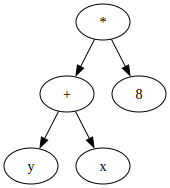

In [1]:
# This line simply prints the algebraic expression we are going to represent
# as a computational graph.
print("8*(y+x)")

# We import Digraph from graphviz to manually construct
# a computation graph (similar to what PyTorch builds internally).
from graphviz import Digraph

# Create a directed graph object named 'ex1'
# Directed graphs are important because computation flows
# in a specific direction (from inputs to output).
g1 = Digraph('ex1')

# Create nodes representing operations and operands.
# In deep learning frameworks like PyTorch, operations
# (like +, *, matmul, etc.) become nodes in the computation graph.

# '*' represents the multiplication operation
g1.node('*', label='*')

# '+' represents the addition operation
g1.node('+', label='+')

# '8', 'y', and 'x' are input operands (leaf nodes in the graph)
g1.node('8', label='8')
g1.node('y', label='y')
g1.node('x', label='x')

# Now we define the edges (data flow).
# Edges show how data flows between operands and operations.

# The multiplication node takes '8' as one input
g1.edge('*','8')

# The multiplication node also takes the result of the '+' operation
g1.edge('*','+')

# The addition node takes 'y' as input
g1.edge('+', 'y')

# The addition node takes 'x' as input
g1.edge('+', 'x')

# Render the graph to a PNG file.
# This creates a visual representation of the computation graph.
# In frameworks like PyTorch, such graphs are created dynamically
# during the forward pass and used for automatic differentiation.
g1.render('ex1', format='png')  # Uncomment if you want to save the figure

# Display the graph in a Jupyter notebook (if applicable)
g1


8*y+x


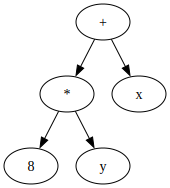

In [2]:
# Print the algebraic expression that we are about to represent
# as a computational graph.
print("8*y+x")

# Create a new directed graph named 'ex2'
# This will represent the computation of 8*y + x
g2 = Digraph('ex2')

# Define operation nodes
# '*' represents multiplication
g2.node('*', label='*')

# '+' represents addition (this will be the final output node)
g2.node('+', label='+')

# Define operand (input) nodes
g2.node('8', label='8')   # Constant
g2.node('y', label='y')   # Variable y
g2.node('x', label='x')   # Variable x

# Define edges (data flow direction)

# The '+' node takes the result of the multiplication as input
g2.edge('+','*')

# The '+' node also takes 'x' directly as input
g2.edge('+','x')

# The '*' node takes '8' as input
g2.edge('*', '8')

# The '*' node takes 'y' as input
g2.edge('*', 'y')

# Render the graph to a PNG file.
# This visualizes how the computation is structured.
# In deep learning frameworks, this structure determines
# how gradients are propagated during backpropagation.
g2.render('ex2', format='png')  # Uncomment if you want to save the figure

# Display the graph (in notebook environments)
g2

# Objective

### ex1: $$8 \times (y + x)$$
$$
ex1 = Times(Const(8), Plus(Var(y),Var(x)))
$$

### ex2: $$3 \times y + x$$
$$ex2 = Plus(Times(Const(8), Var(y)), Var(x)) $$

# Evaluate The Expressions
vals = {"x":5, "y":10}

ex1.eval(vals)

In [59]:
def fact(n):
    if n==0:
        return 1

    return n*fact(n-1)

fact(5)

120

In [60]:
# ============================================================
# Base Class for All Expressions
# ============================================================

# Expr is the abstract superclass.
# It represents a node in an expression tree (computation graph).
# In deep learning terms, this is conceptually similar to a node
# in PyTorch’s dynamic computation graph.
class Expr:
    pass


# ============================================================
# Constant Node (Leaf Node)
# Example: 3, 8, etc.
# ============================================================

class Const(Expr):
    
    # Constructor stores the constant value
    def __init__(self, val):
        self.val = val  
    
    # Accessor method
    def getVal(self):
        return self.val
    
    # Defines how the object is printed (string representation)
    # This allows us to print expressions nicely.
    def __str__(self):
        return str(self.getVal())
    
    # Evaluate the constant.
    # Since it's a constant, it ignores the environment.
    # This is similar to a constant tensor in PyTorch.
    def eval(self, env):
        return self.getVal()


# ============================================================
# Variable Node (Leaf Node)
# Example: x, y
# ============================================================

class Var(Expr):
    
    # Constructor stores variable name
    def __init__(self, name):
        self.name = name
        
    # Accessor method
    def getName(self):
        return self.name
        
    # String representation
    def __str__(self):
        return self.getName()
    
    # Evaluate the variable using an environment (dictionary).
    # The environment maps variable names to numeric values.
    # Example: {"x": 2, "y": 3}
    def eval(self, env):
        return env[self.name]


# ============================================================
# Binary Operation: Multiplication
# ============================================================

class Times(Expr):
    
    # l and r represent left and right sub-expressions
    def __init__(self, l, r):
        self.l = l
        self.r = r
        
    # Accessors
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
          
    # String representation (fully parenthesized)
    # This shows the structure of the expression tree.
    def __str__(self):
        return "(" + str(self.getLeft()) + "*" + str(self.getRight()) + ")"
    
    # Evaluate recursively.
    # First evaluate left subtree,
    # then evaluate right subtree,
    # then multiply the results.
    #
    # This is equivalent to the forward pass
    # in a computation graph.
    def eval(self, env):
        return self.getLeft().eval(env) * self.getRight().eval(env)


# ============================================================
# Binary Operation: Addition
# ============================================================

class Plus(Expr):
    
    def __init__(self, l, r):
        self.l = l
        self.r = r
    
    # String representation
    def __str__(self):
        return "(" + str(self.l) + "+" + str(self.r) + ")"
    
    # Accessors
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
    
    # Recursive evaluation (forward computation)
    def eval(self, env):
        return self.getLeft().eval(env) + self.getRight().eval(env)


# ============================================================
# Construct Expression 1: 8*(y + x)
# ============================================================

# This builds the following tree:
#
#         *
#        / \
#       8   +
#          / \
#         y   x
#
# Notice how the structure mirrors the computation graph
# you previously created using Graphviz.

ex1 = Times(Const(8), Plus(Var("y"), Var("x")))


# ============================================================
# Construct Expression 2: 8*y + x
# ============================================================

# This builds a different tree:
#
#          +
#         / \
#        *   x
#       / \
#      8   y
#
# The structure is different, even though the algebra
# looks similar.

ex2 = Plus(Times(Const(8), Var("y")), Var("x")) 


# ============================================================
# Print the symbolic expressions
# ============================================================

print(ex1)   # prints: (8*(y+x))
print(ex2)   # prints: ((8*y)+x)

(8*(y+x))
((8*y)+x)


In [62]:
# Evaluate The Expressions
vals = {"x":10, "y":100}
ex1.eval(vals)


880

# Basics of PyTorch

#### Tensors and Properties: RANDOM and Reproducibility

In [7]:
import torch

In [68]:
import numpy as np

# ============================================================
# Set seed for reproducibility
# ============================================================

# Setting a random seed ensures that every time this code runs,
# the same "random" numbers are generated.
# This is extremely important in machine learning experiments
# so results can be reproduced and compared fairly.
#
# In PyTorch, the equivalent would be:
#torch.manual_seed(0)

#np.random.seed(0)


# ============================================================
# Predefined Matrix of shape (2, 3)
# ============================================================

# Creates a 2x3 matrix (2 rows, 3 columns).
# Shape = (rows, columns)
#
# Matrix:
# [ 4  5  6 ]
# [ 1  7  8 ]
#
# This is a typical way to manually define input data,
# weights, or small toy examples in linear algebra.

np.array([[4, 5, 6], 
          [1, 7, 8]])


# ============================================================
# Zero Matrix of shape (3, 3)
# ============================================================

# Creates a 3x3 matrix filled entirely with zeros.
#
# Often used to:
# - Initialize gradients
# - Initialize accumulators
# - Create placeholder tensors
#
# In PyTorch, the equivalent would be:
torch.zeros((3,3))

np.zeros((3,3))


# ============================================================
# Identity Matrix of shape (2, 2)
# ============================================================

# Creates a 2x2 identity matrix.
#
# Identity matrix:
# [1 0]
# [0 1]
#
# Important properties:
# - Acts as multiplicative identity in matrix multiplication
# - A @ I = A
#
# Frequently used in:
# - Linear algebra
# - Change of basis
# - Neural network initialization tricks

np.eye(2)


# ============================================================
# Random Matrix of shape (3, 3)
# ============================================================

# Generates a 3x3 matrix with values drawn from
# a uniform distribution over [0, 1).
#
# Because we set the random seed above,
# this matrix will always be the same across runs.
#
# Random matrices are commonly used for:
# - Weight initialization in neural networks
# - Random projections
# - Simulation experiments
#
# PyTorch equivalent:
# torch.rand((3,3))

np.random.rand(3,3)

array([[0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985]])

In [69]:
import torch

# ============================================================
# Set seed for reproducibility
# ============================================================

# Sets the random seed for PyTorch.
# This ensures that any random numbers generated (e.g., random weights)
# will be the same every time the code runs.
#
# Reproducibility is critical in deep learning experiments:
# - To compare models fairly
# - To debug training issues
# - To make research results verifiable
#
# NumPy equivalent: np.random.seed(0)

torch.manual_seed(0)


# ============================================================
# Predefined Tensor of shape (2, 3)
# ============================================================

# Creates a 2x3 tensor (2 rows, 3 columns).
#
# Tensor:
# [ 4  5  6 ]
# [ 1  7  8 ]
#
# In PyTorch, tensors are the core data structure.
# They are similar to NumPy arrays but:
# - Can track gradients
# - Can run on GPUs
# - Support automatic differentiation

x = torch.tensor([[4, 5, 6], 
                  [1, 7, 8]])

# Check the type of x
# This shows that x is a torch.Tensor object.
print(type(x))


# ============================================================
# Zero Tensor of shape (3, 3)
# ============================================================

# Creates a 3x3 tensor filled with zeros.
#
# Common uses in deep learning:
# - Initialize gradients
# - Initialize bias terms
# - Create placeholder tensors

torch.zeros((3,3))


# ============================================================
# Identity Matrix of shape (2, 2)
# ============================================================

# Creates a 2x2 identity matrix.
#
# Identity matrix:
# [1 0]
# [0 1]
#
# Important property:
# A @ I = A
#
# Frequently used in:
# - Linear algebra
# - Certain neural network initializations
# - Residual connections (conceptually)

torch.eye(2)


# ============================================================
# Random Tensor of shape (3, 3)
# ============================================================

# Generates a 3x3 tensor with values sampled from
# a uniform distribution over [0, 1).
#
# Because we set torch.manual_seed(0),
# this random tensor will be the same across runs.
#
# Random tensors are commonly used for:
# - Weight initialization
# - Random feature generation
# - Simulation experiments

torch.rand(3,3)

<class 'torch.Tensor'>


tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])

## Dimension operations on Tensors.

In [71]:
##### Dimension operations on Tensors.


import torch

# ============================================================
# Scalar (0-D Tensor)
# ============================================================

# A scalar is a single number.
# In PyTorch, even a single number is stored as a tensor.
# This is called a 0-dimensional tensor (0-D tensor).

s = torch.tensor(1.)

print(f"Scalar s: {s}")

# Check the number of dimensions using .dim()
# Scalars have dimension 0.

d = s.dim()

print(f"Dimension of scalar is: {d}")


# ============================================================
# Vector (1-D Tensor)
# ============================================================

# A vector is a 1-dimensional tensor.
# It has only one axis (length).

v = torch.tensor([1., 2., 3.])

print(f"Vector v: {v}")

# Check number of dimensions
# Vectors have dimension 1.

d = v.dim()

print(f"Dimension of vector is: {d}")


# ============================================================
# Matrix (2-D Tensor)
# ============================================================

# A matrix has two dimensions:
# (rows, columns)
#
# Shape here is (2, 3)
# 2 rows and 3 columns.

m = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.]])

d = m.dim()

print(f"Dimension of matrix is: {d}")


# ============================================================
# Higher-Order Tensor (3-D Tensor)
# ============================================================

# Now we create a 3-dimensional tensor.
#
# Think of this as:
# - A stack of matrices
# - Or data with depth
#
# Shape here is (1, 4, 3)
# Meaning:
# 1 block
# 4 rows
# 3 columns

t = torch.tensor([[[1., 2., 3.],
                   [4., 5., 6.],
                   [1., 2., 3.],
                   [4., 5., 6.]]])

d = t.dim()

print(f"Dimension of tensor is: {d}")

Scalar s: 1.0
Dimension of scalar is: 0
Vector v: tensor([1., 2., 3.])
Dimension of vector is: 1
Dimension of matrix is: 2
Dimension of tensor is: 3


## Methods on Tensors: SUM using Tensor method and Functional Interface

In [75]:
import torch

# ============================================================
# Set seed for reproducibility
# ============================================================

# Ensures that the random numbers generated by torch.rand()
# are the same every time this code runs.
# This is essential for debugging and reproducible experiments.

torch.manual_seed(0)


# ============================================================
# Create a Random Matrix of shape (3, 2)
# ============================================================

# Creates a 3x2 tensor with values drawn from
# a uniform distribution over [0, 1).
#
# Shape:
# 3 rows
# 2 columns
#
# Think of this as:
# - 3 samples
# - 2 features per sample

x = torch.rand(3, 2)

print(f"x:\n{x}")


# ============================================================
# Summation Along a Dimension (Method 1)
# ============================================================

# torch.sum(input, dim=1)
#
# dim=1 means:
# → collapse (reduce) across columns
# → sum values row-wise
#
# Since x has shape (3, 2):
# Summing across dim=1 removes the column dimension.
#
# Result shape will be (3,)
# Each value represents the sum of one row.

xsum = torch.sum(x, dim=1)

print(f"xsum using method 1: {xsum}")


# ============================================================
# Summation Along a Dimension (Method 2)
# ============================================================

# This is the same operation, but using the tensor method
# instead of the torch functional interface.
#
# Both are equivalent:
# torch.sum(x, dim=1)
# x.sum(dim=1)

xsum2 = x.sum(dim=0)

print(f"xsum using method 2: {xsum2}")


x:
tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341]])
xsum using method 1: tensor([1.2645, 0.2205, 0.9415])
xsum using method 2: tensor([0.8922, 1.5343])


# Reshape : `view` and  `reshape`  methods

In [76]:
import torch

#### ============================================================
#### In-place Reshaping using .view()
#### ============================================================

# Create a 1-D tensor (vector) of length 12
# Shape: (12,)
# This is a rank-1 tensor (1-dimensional)

x = torch.tensor([1, 2, 3, 4, 5, 6, 
                  7, 8, 9, 10, 11, 12])


# ------------------------------------------------------------
# Reshape into a matrix of shape (3, 4)
# ------------------------------------------------------------

# .view(rows, columns) reshapes the tensor WITHOUT copying data.
# It returns a new view of the same underlying memory.
#
# Important:
# Total number of elements must remain the same.
# 12 elements → 3 * 4 = 12 (valid)

x = x.view(3, 4)

print(f"x =\n{x}")

# Shape is now (3, 4)


# ------------------------------------------------------------
# Reshape using -1 (automatic dimension inference)
# ------------------------------------------------------------

# Using -1 tells PyTorch:
# "Automatically infer this dimension based on the other one."
#
# Here:
# We fix columns = 4
# PyTorch calculates rows automatically.
#
# Since total elements = 12:
# rows = 12 / 4 = 3

x = x.view(-1, 4)

print(f"x =\n{x}")

# Shape is still (3, 4)

x =
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
x =
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


## Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [77]:
import torch

# ============================================================
# Set seed for reproducibility
# ============================================================

# Ensures that the randomly generated tensor will be the same
# every time this code runs.
# This is important for reproducible experiments.

torch.manual_seed(0)


# ============================================================
# Create a Random Vector of length 3
# ============================================================

# torch.rand(3) creates a 1-D tensor (vector) of size 3
# with values sampled uniformly from [0, 1).

x = torch.rand(3)


# ============================================================
# Compute Vector Norms
# ============================================================

# L1 Norm (Manhattan norm)
# Formula:
# ||x||_1 = |x1| + |x2| + ... + |xn|
#
# Measures total magnitude across dimensions.
# Commonly used in:
# - L1 regularization (Lasso)
# - Sparsity constraints

x.norm(p=1)


# L2 Norm (Euclidean norm)
# Formula:
# ||x||_2 = sqrt(x1^2 + x2^2 + ... + xn^2)
#
# Measures geometric length of the vector.
# Commonly used in:
# - L2 regularization (Ridge)
# - Weight decay
# - Distance calculations

x.norm(p=2)


# ============================================================
# Print Results
# ============================================================

print(f"L1 Norm of x is: {x.norm(p=1)}")
print(f"L2 Norm of x is: {x.norm(p=2)}")

L1 Norm of x is: 1.3529558181762695
L2 Norm of x is: 0.9188381433486938


# Computing Norm of a vector without using the method

In [17]:
# ============================================================
# Manually Computing L1 and L2 Norms
# ============================================================

# L1 Norm Definition:
# ||x||_1 = sum of absolute values
#
# Step 1: Take absolute value of each element
# Step 2: Sum them

n1 = torch.sum(torch.abs(x))

print(f"L1 norm is: {n1}")


# ------------------------------------------------------------
# L2 Norm Definition:
# ||x||_2 = sqrt(sum(x_i^2))
#
# Step 1: Square each element
# Step 2: Sum them
# Step 3: Take square root

n2 = torch.sqrt(torch.sum(x**2))

print(f"L2 norm is: {n2}")

L1 norm is: 1.3529558181762695
L2 norm is: 0.9188381433486938


## Calling methods directly on the tensor


In [19]:
# L1 Norm using method chaining
# x.abs() → absolute value
# .sum() → sum of elements

n1 = x.abs().sum()

print(f"L1 norm is: {n1}")


# L2 Norm using method chaining
# (x**2) → element-wise square
# .sum() → sum of squares
# .sqrt() → square root

n2 = (x**2).sum().sqrt()

print(f"L2 norm is: {n2}")

L1 norm is: 1.3529558181762695
L2 norm is: 0.9188381433486938


### Tensors on GPU

In [79]:
torch.cuda.is_available()

False

In [80]:
import torch

# ============================================================
# Check if CUDA (GPU support) is available
# ============================================================

# torch.cuda.is_available() returns:
# True  → If a CUDA-capable GPU is available and properly configured
# False → If only CPU is available
#
# CUDA is NVIDIA’s parallel computing platform that allows
# PyTorch to run computations on the GPU instead of the CPU.
#
# GPUs are extremely important in deep learning because:
# - They handle massive parallel matrix operations efficiently
# - They significantly accelerate training
# - They allow large models to be trained in reasonable time

torch.cuda.is_available()

# ============================================================
# Create a Tensor (default device: CPU)
# ============================================================

# torch.Tensor(...) creates a floating-point tensor.
# By default, all tensors are created on the CPU
# unless explicitly specified otherwise.

x = torch.Tensor([[4, 5, 8],
                  [3, 8, 9]])

# At this point:
# x.device → should return 'cpu'


# ============================================================
# Define Devices
# ============================================================

# Explicitly define a CPU device object
dev_cpu = torch.device("cpu")

# Define a GPU device object
# "cuda:0" refers to:
# - CUDA backend
# - GPU index 0 (first GPU)
#
# If multiple GPUs exist:
# cuda:1 → second GPU
# cuda:2 → third GPU
# etc.

dev_gpu = torch.device("cuda:0")


# ============================================================
# Send Tensor to GPU
# ============================================================

# .to(device) moves the tensor to the specified device.
#
# IMPORTANT:
# This does NOT modify x in-place.
# It returns a NEW tensor on the target device.
#
# So you must reassign it if you want x on GPU.

x_gpu = x.to(dev_cpu)

# Now:
# x_gpu.device → should return 'cuda:0'


In [81]:
import torch

# ============================================================
# Select Device at the Start of the Program
# ============================================================

# This line creates a device object that automatically chooses:
#
# - "cuda"  → if a GPU is available
# - "cpu"   → otherwise
#
# torch.cuda.is_available() returns True if:
# - A CUDA-capable GPU exists
# - Drivers are installed
# - PyTorch was built with CUDA support
#
# This pattern makes your code portable:
# It runs on both CPU-only machines and GPU machines
# without changing the rest of the code.

device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")


# ============================================================
# Later: Move Tensor to the Selected Device
# ============================================================

# .to(device) sends the tensor to whichever device was chosen above.
#
# IMPORTANT:
# .to() is NOT in-place.
# It returns a new tensor on the target device.
# You must reassign it if you want the change to persist.

x = x.to(device)

# Now:
print(f"x is on device: {x.device}") #will be either:
#   cpu
#   cuda:0

x is on device: cpu


### NumPy ----> PyTorch ----> NumPy

In [83]:
import numpy as np
x = np.random.random((4,4))
print(x)

[[0.77815675 0.87001215 0.97861834 0.79915856]
 [0.46147936 0.78052918 0.11827443 0.63992102]
 [0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395]]


In [85]:
import torch
import numpy as np

# ============================================================
# NumPy → PyTorch Conversion
# ============================================================

# Suppose x is a NumPy array
# torch.from_numpy() converts it into a PyTorch tensor.
#
# IMPORTANT:
# - The tensor shares memory with the NumPy array.
# - No copy is made.
# - Changing one will change the other.

y = torch.from_numpy(x)
# A = y*2
# Da/dy


# ============================================================
# Enable Gradient Tracking
# ============================================================

# By default, tensors created from NumPy do NOT track gradients.
#
# requires_grad_() enables autograd tracking IN-PLACE.
# The trailing underscore (_) means:
# → this operation modifies the tensor itself.

y = y.requires_grad_()

# Proper way to check if gradient tracking is enabled:
print(y.requires_grad)    # Boolean: True

True


## Differentiability in PyTorch 

In [86]:
# ============================================================
# Why requires_grad=True is Useful
# ============================================================

import torch

# Create a tensor with gradient tracking enabled.
# requires_grad=True tells PyTorch:
# "Track all operations performed on this tensor."
#
# This means:
# - A computation graph will be built dynamically
# - Gradients can later be computed using backpropagation

x = torch.tensor([2.0], requires_grad=True)


# ------------------------------------------------------------
# Define a function of x
# ------------------------------------------------------------

# f(x) = x^2 + 3x + 2
#
# Since x.requires_grad=True,
# PyTorch automatically builds the computation graph:
#
#      x
#     / \
#   x*x  3*x
#       \   /
#        + 
#         + 2

f = x**2 + 3*x + 2


# ------------------------------------------------------------
# Backward Pass (Automatic Differentiation)
# ------------------------------------------------------------

# f.backward() computes df/dx.
#
# Since f is a scalar (single value),
# PyTorch automatically computes:
#
# df/dx and stores it in x.grad

f.backward()


# ------------------------------------------------------------
# Print the gradient
# ------------------------------------------------------------

# The derivative of:
# f(x) = x^2 + 3x + 2
#
# is:
# f'(x) = 2x + 3
#
# At x = 2:
# f'(2) = 2(2) + 3 = 7

print("Gradient at x=2:", x.grad)


Gradient at x=2: tensor([7.])


In [30]:
# ============================================================
# Automatic Differentiation with Multiple Variables
# ============================================================

import torch

# Create a tensor with two variables: x and y
# requires_grad=True tells PyTorch to track computations
# involving these variables.
#
# xy[0] → x
# xy[1] → y

xy = torch.tensor([2.0, 3.0], requires_grad=True)


# ------------------------------------------------------------
# Define the function:
# f(x, y) = x^2 + y^2 + 3xy
# ------------------------------------------------------------

# PyTorch builds a dynamic computation graph
# as we perform operations on xy.

f = xy[0]**2 + xy[1]**2 + 3 * xy[0] * xy[1]


# ------------------------------------------------------------
# Backward Pass
# ------------------------------------------------------------

# Since f is a scalar, calling backward() computes Jacobian:
#
# J = [∂f/∂x, ∂f/∂y]
#
# These are stored in xy.grad

f.backward()


# ------------------------------------------------------------
# Print the gradient vector
# ------------------------------------------------------------

print("Gradient (df/dx, df/dy):", xy.grad)

Gradient (df/dx, df/dy): tensor([13., 12.])


# Mathematical Explanation of Vector-Valued Automatic Differentiation

## 1. Problem Setup

We define the input vector:

$$
x =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}
$$

We define the vector-valued function:

$$
f(x) =
\begin{bmatrix}
x_1^2 \\
e^{x_2} \\
\sin(x_3)
\end{bmatrix}
$$

This is a mapping:

$$
f: \mathbb{R}^3 \rightarrow \mathbb{R}^3
$$

---

## 2. Jacobian Matrix

For a vector-valued function, the derivative is the Jacobian matrix:

$$
J =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial x_3} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial x_3} \\
\frac{\partial f_3}{\partial x_1} & \frac{\partial f_3}{\partial x_2} & \frac{\partial f_3}{\partial x_3}
\end{bmatrix}
$$

---

## 3. Compute Partial Derivatives

For:

$$
f_1(x) = x_1^2
$$

$$
\frac{\partial f_1}{\partial x_1} = 2x_1, \quad
\frac{\partial f_1}{\partial x_2} = 0, \quad
\frac{\partial f_1}{\partial x_3} = 0
$$

For:

$$
f_2(x) = e^{x_2}
$$

$$
\frac{\partial f_2}{\partial x_1} = 0, \quad
\frac{\partial f_2}{\partial x_2} = e^{x_2}, \quad
\frac{\partial f_2}{\partial x_3} = 0
$$

For:

$$
f_3(x) = \sin(x_3)
$$

$$
\frac{\partial f_3}{\partial x_1} = 0, \quad
\frac{\partial f_3}{\partial x_2} = 0, \quad
\frac{\partial f_3}{\partial x_3} = \cos(x_3)
$$

---

## 4. Final Jacobian

$$
J =
\begin{bmatrix}
2x_1 & 0 & 0 \\
0 & e^{x_2} & 0 \\
0 & 0 & \cos(x_3)
\end{bmatrix}
$$

---

## 5. Evaluate at (2, 3, 4)

$$
J =
\begin{bmatrix}
4 & 0 & 0 \\
0 & e^3 & 0 \\
0 & 0 & \cos(4)
\end{bmatrix}
$$

---

## 6. What PyTorch Computes

PyTorch computes a **vector–Jacobian product (VJP)**:

$$
J^T v
$$

If:

$$
v =
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$

Then the result is:

$$
\begin{bmatrix}
2x_1 \\
e^{x_2} \\
\cos(x_3)
\end{bmatrix}
$$

In [89]:
import torch

# ============================================================
# Helper Function to Compute Gradients
# ============================================================

def gradients(outputs, inputs):
    """
    Computes gradients of 'outputs' with respect to 'inputs'.

    torch.autograd.grad:
    - Computes gradients explicitly
    - Does NOT accumulate into .grad
    - Returns the gradients directly

    grad_outputs=torch.ones_like(outputs):
        Required when outputs is NOT scalar.
        This tells PyTorch:
        "Assume dL/d(outputs) = 1"

    create_graph=True:
        Keeps the computation graph of the gradients.
        This allows higher-order derivatives later.
    """
    return torch.autograd.grad(
        outputs,
        inputs,
        grad_outputs=torch.ones_like(outputs),
        create_graph=True
    )


# ============================================================
# Define Vector Input
# ============================================================

# x is a column vector with shape (3,1)
# requires_grad=True enables autograd tracking.

x = torch.tensor([[2.0],
                  [3.0],
                  [4.0]], requires_grad=True)


# ============================================================
# Define Vector-Valued Function
# ============================================================

# Define three scalar functions of independent variables

# f1(x1) = x1^2
f1 = x[0]**2 # torch.multiply(x[0]*x[0])

# f2(x2) = e^(x2)
f2 = torch.exp(x[1])
#f2 = np.exp(x[1]) 


# f3(x3) = sin(x3)
f3 = torch.sin(x[2])

# Stack them together to form a vector-valued function:
#
# f(x) = [f1, f2, f3]
#
# Shape will be (3,1)

f = torch.stack([f1, f2, f3])


# ============================================================
# Compute Gradients
# ============================================================

# Since f is NOT scalar,
# we cannot directly call f.backward().
#
# Instead we use torch.autograd.grad,
# which computes vector-Jacobian products.

df = gradients(f, x)
print(f"Jacobian:{df}")

Jacobian:(tensor([[ 4.0000],
        [20.0855],
        [-0.6536]], grad_fn=<AddBackward0>),)


In [40]:
# ============================================================
# PyTorch → NumPy Conversion
# ============================================================

# Convert a PyTorch tensor to a NumPy array.
#
# .numpy() works ONLY if:
# 1) The tensor is on the CPU
# 2) The tensor does NOT require gradients
#
# If the tensor requires gradients, you must detach it first:
y = df[0].detach().numpy()

# If the tensor does not require gradients:
#x = y.numpy()

print(y)

[[ 4.       ]
 [20.085537 ]
 [-0.6536436]]


### Timing GPU Operations

In [41]:
import torch

# ============================================================
# Create a Batch of Matrices
# ============================================================

# torch.rand(100, 400, 400) creates a 3D tensor.
#
# Shape explanation:
# (batch_size, rows, columns)
#
# Here:
# - 100 matrices
# - Each matrix is 400 x 400
#
# Think of this as:
# A batch of 100 square matrices.

A = torch.rand(100, 400, 400)


# ------------------------------------------------------------
# (Optional) Move Tensor to GPU
# ------------------------------------------------------------

# Uncomment this if a CUDA GPU is available.
# This moves the entire batch to GPU memory.
#
# B = A.cuda()

# IMPORTANT:
# All computations must occur on the same device.
# If using GPU, both operands must be on GPU.


# ============================================================
# Check Tensor Size
# ============================================================

# .size() returns the shape of the tensor.
# Expected output: torch.Size([100, 400, 400])

A.size()


# ============================================================
# Batch Matrix Multiplication (CPU Timing)
# ============================================================

# torch.bmm performs batch matrix multiplication.
#
# It multiplies corresponding matrices in the batch:
#
# For each i in 0..99:
#     Result[i] = A[i] @ A[i]
#
# This is more efficient than looping manually.
#
# %timeit (Jupyter magic command):
# -n 3 → run 3 times per loop
# Measures execution time for benchmarking.

%timeit -n 3 torch.bmm(A, A)


# ============================================================
# Batch Matrix Multiplication (GPU Timing)
# ============================================================

# If using GPU:
# %timeit -n 3 torch.bmm(B, B)
#
# Typically much faster for large matrices
# because GPUs are optimized for parallel matrix operations.

133 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


# Einstein Summation: 2D Tensor

In [46]:
import torch

# ============================================================
# Set Seed for Reproducibility
# ============================================================

# Ensures that random integers generated below
# are the same every time the code runs.

torch.manual_seed(1234)


# ============================================================
# Create Random Integer Matrices
# ============================================================

# torch.randint(low, high, size)
#
# Generates random integers in the range [low, high)
# (high is exclusive).
#
# A has shape (3, 4)
# → 3 rows, 4 columns

A = torch.randint(3, 10, (3, 4))


# B has shape (4, 3)
# → 4 rows, 3 columns

B = torch.randint(3, 10, (4, 3))


# ============================================================
# Matrix Multiplication using torch.matmul
# ============================================================

# torch.matmul performs matrix multiplication.
#
# Since:
# A → (3,4)
# B → (4,3)
#
# The inner dimensions match (4).
#
# Resulting matrix shape:
# (3,3)

C_mm=torch.matmul(A, B)


# ============================================================
# Matrix Multiplication using Einstein Summation
# ============================================================

# torch.einsum uses Einstein summation notation.
#
# "ij, jk -> ik" means:
#
# - First tensor (A): indexed by i,j
# - Second tensor (B): indexed by j,k
# - j is repeated → sum over j
# - Output indexed by i,k
#
# This is exactly the definition of matrix multiplication:
#
# C[i,k] = sum_j A[i,j] * B[j,k]

C_es = torch.einsum("ij, jk -> ik", A, B)
assert torch.equal(C_mm, C_es)


# Einstein Summation: 3D Tensor

In [48]:
import torch

# ============================================================
# Set Seed for Reproducibility
# ============================================================

# Ensures the random tensors generated below
# are identical every time the code runs.

torch.manual_seed(1234)


# ============================================================
# Create Batched Tensors
# ============================================================

# A has shape (3, 4, 3)
#
# Interpretation:
# - batch size = 3
# - each matrix is 4 × 3
#
# So we have 3 matrices of size (4,3)

A = torch.randint(3, 10, (3, 4, 3))


# B has shape (3, 3, 4)
#
# Interpretation:
# - batch size = 3
# - each matrix is 3 × 4
#
# So we have 3 matrices of size (3,4)

B = torch.randint(3, 10, (3, 3, 4))


# ============================================================
# Batched Matrix Multiplication using Einstein Summation
# ============================================================

# "bij, bjk -> bik"
#
# Index explanation:
#
# b → batch dimension
# i → row index
# j → shared summation index
# k → column index
#
# A indexed as: b,i,j
# B indexed as: b,j,k
#
# j appears in both → sum over j
#
# Output indexed as: b,i,k
#
# So for each batch b:
# C[b] = A[b] @ B[b]
#
# This performs batch matrix multiplication.

C = torch.einsum("bij, bjk -> bik", A, B)

print(C)


tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])


# Function Approximations

### Parabolic Function

In [35]:
!pip install torchsummary

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


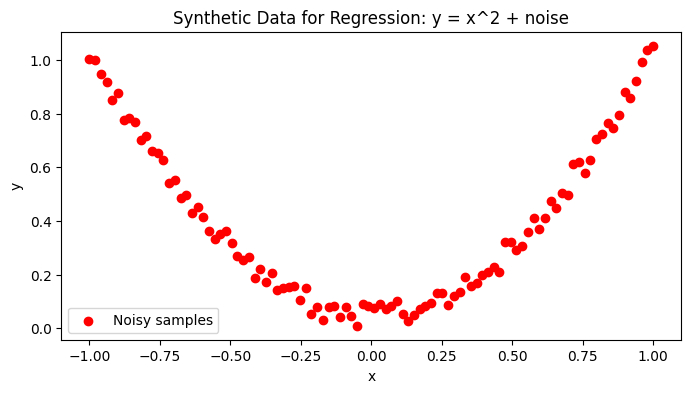

In [50]:
# ============================================================
# Synthetic Data Generation for Regression
# ============================================================

import numpy as np
import torch
import matplotlib.pyplot as plt

# (Jupyter) display plots inside the notebook
%matplotlib inline


# ------------------------------------------------------------
# Reproducibility
# ------------------------------------------------------------

# Fixes PyTorch random number generation so the dataset (noise)
# is the same every time you run the notebook.
torch.manual_seed(1234)


# ------------------------------------------------------------
# Create a simple 1D regression dataset
# ------------------------------------------------------------

N_p = 100  # number of data points

# torch.linspace(-1, 1, N_p) creates N_p evenly spaced points in [-1, 1]
# Shape before unsqueeze: (N_p,)
#
# unsqueeze(dim=1) converts it to a column vector:
# Shape after unsqueeze: (N_p, 1)
# This matches the typical ML convention:
# (num_samples, num_features)

x = torch.linspace(-1, 1, N_p).unsqueeze(1)


# True underlying function: y = x^2
# torch.square(x) performs element-wise squaring.
y = torch.square(x)

# Add random noise to make the regression problem realistic.
# torch.rand(y.size()) produces values in [0, 1) with same shape as y.
# Noise magnitude is scaled by 0.1
y = y + 0.1 * torch.rand_like(y)


# ------------------------------------------------------------
# Plot the dataset
# ------------------------------------------------------------

plt.figure(figsize=(8, 4))

# Convert tensors to NumPy for plotting
# (These tensors are on CPU and do not require gradients, so .numpy() is safe.)
x_plot = x.numpy()
y_plot = y.numpy()

plt.scatter(x_plot, y_plot, color="red", label="Noisy samples")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data for Regression: y = x^2 + noise")
plt.legend()
plt.show()

Iteration: 0 | Loss: 0.384567
Iteration: 50 | Loss: 0.001985
Iteration: 100 | Loss: 0.000817
Iteration: 150 | Loss: 0.000737


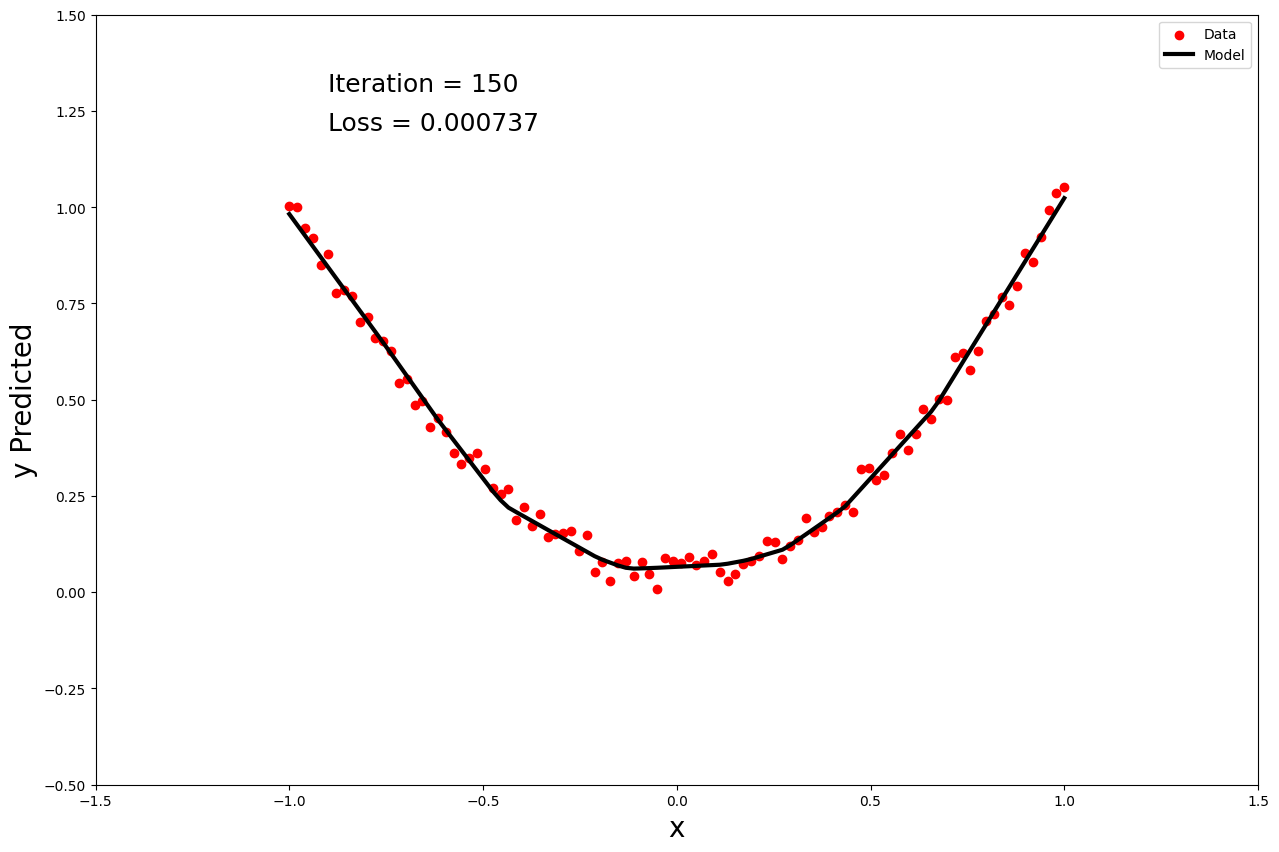

In [51]:
# ============================================================
# Neural Network Regression Example: y = x^2 + Noise
# ============================================================

import numpy as np
import torch
import matplotlib.pyplot as plt
import imageio

%matplotlib inline


# ------------------------------------------------------------
# Reproducibility
# ------------------------------------------------------------

torch.manual_seed(1234)


# ------------------------------------------------------------
# Generate Synthetic Dataset
# ------------------------------------------------------------

# Create 100 evenly spaced points in [-1, 1]
# unsqueeze(1) converts shape from (100,) to (100,1)
# Required for nn.Linear which expects (batch_size, features)

x = torch.linspace(-1, 1, 100).unsqueeze(1)

# True function: y = x^2
y = torch.square(x)

# Add uniform random noise
y = y + 0.1 * torch.rand_like(y)

# Convert to NumPy once for plotting (safe: no gradients required)
x_plot = x.numpy()
y_plot = y.numpy()


# ------------------------------------------------------------
# Define Neural Network
# ------------------------------------------------------------

in_dim = 1
out_dim = 1

Net = torch.nn.Sequential(
    torch.nn.Linear(in_dim, 40), 
    torch.nn.LeakyReLU(), 
    torch.nn.Linear(40, out_dim)
)

# ------------------------------------------------------------
# Optimization Setup
# ------------------------------------------------------------

optimizer = torch.optim.Adam(Net.parameters(), lr=0.01) 
loss_function = torch.nn.MSELoss()


# ------------------------------------------------------------
# Training Loop
# ------------------------------------------------------------

image_list = []
Niter = 151  # 150 iterations + initial step

fig, ax = plt.subplots(figsize=(15, 10))

for it in range(Niter):

    # Forward pass
    y_pred = Net(x)

    # Compute loss (Mean Squared Error)
    loss = loss_function(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() W_n+1 =W_n --

    # Print progress
    if it % 50 == 0:
        print(f"Iteration: {it} | Loss: {loss.item():.6f}")

    # --------------------------------------------------------
    # Visualization
    # --------------------------------------------------------

    ax.clear()

    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y Predicted", fontsize=20)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

    # Plot noisy data
    ax.scatter(x_plot, y_plot, color="red", label="Data")

    # Plot model prediction
    ax.plot(x_plot, y_pred.detach().numpy(), "k-", lw=3, label="Model")

    ax.legend()

    ax.text(-0.9, 1.3, f"Iteration = {it}", fontsize=18)
    ax.text(-0.9, 1.2, f"Loss = {loss.item():.6f}", fontsize=18)

    fig.canvas.draw()

    # Convert figure to image array
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    image_list.append(image)


# ------------------------------------------------------------
# Save Training Animation
# ------------------------------------------------------------

imageio.mimsave("Parabolic_regression.gif", image_list, fps=5)

### Sin Function

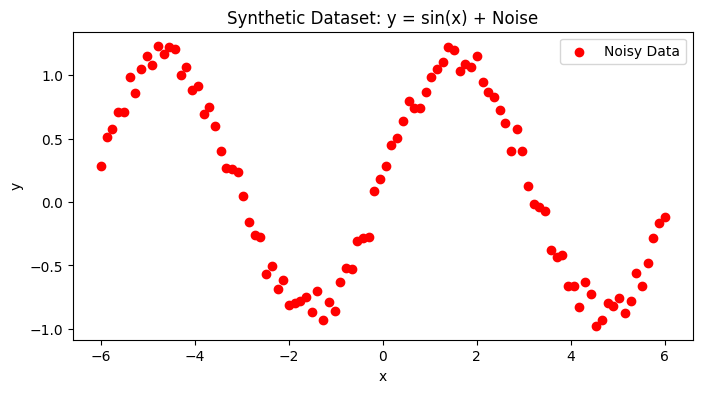

In [52]:
# ============================================================
# Synthetic Dataset for Regression: y = sin(x) + Noise
# ============================================================

import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline


# ------------------------------------------------------------
# Reproducibility
# ------------------------------------------------------------

# Fix random seed so noise is identical across runs
torch.manual_seed(1234)


# ------------------------------------------------------------
# Generate Input Data
# ------------------------------------------------------------

# Create 100 evenly spaced points in [-6, 6]
# Shape before unsqueeze: (100,)
# Shape after unsqueeze(1): (100,1)
# Required for neural network input format:
# (num_samples, num_features)

x = torch.linspace(-6, 6, 100).unsqueeze(1)


# ------------------------------------------------------------
# Define Target Function
# ------------------------------------------------------------

# True function: y = sin(x)
y = torch.sin(x)

# Add uniform random noise to make regression realistic
# Noise amplitude = 0.30
y = y + 0.30 * torch.rand_like(y)


# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------

plt.figure(figsize=(8, 4))

# Convert tensors to NumPy (safe: no gradients involved)
x_plot = x.numpy()
y_plot = y.numpy()

plt.scatter(x_plot, y_plot, color="red", label="Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Dataset: y = sin(x) + Noise")
plt.legend()
plt.show()

Iteration: 0 | Loss: 0.803406
Iteration: 50 | Loss: 0.113736
Iteration: 100 | Loss: 0.107864
Iteration: 150 | Loss: 0.102727
Iteration: 200 | Loss: 0.092319
Iteration: 250 | Loss: 0.075838
Iteration: 300 | Loss: 0.053860
Iteration: 350 | Loss: 0.033736
Iteration: 400 | Loss: 0.019916
Iteration: 450 | Loss: 0.014756
Iteration: 500 | Loss: 0.011732
Iteration: 550 | Loss: 0.009940
Iteration: 600 | Loss: 0.011953
Iteration: 650 | Loss: 0.008818
Iteration: 700 | Loss: 0.007791
Iteration: 750 | Loss: 0.011380
Iteration: 800 | Loss: 0.007007
Iteration: 850 | Loss: 0.006976
Iteration: 900 | Loss: 0.006732
Iteration: 950 | Loss: 0.006686
Iteration: 1000 | Loss: 0.006196
Iteration: 1050 | Loss: 0.006176
Iteration: 1100 | Loss: 0.006567
Iteration: 1150 | Loss: 0.006739
Iteration: 1200 | Loss: 0.008428
Iteration: 1250 | Loss: 0.005703
Iteration: 1300 | Loss: 0.005616
Iteration: 1350 | Loss: 0.005885
Iteration: 1400 | Loss: 0.005508
Iteration: 1450 | Loss: 0.005790
Iteration: 1500 | Loss: 0.006570


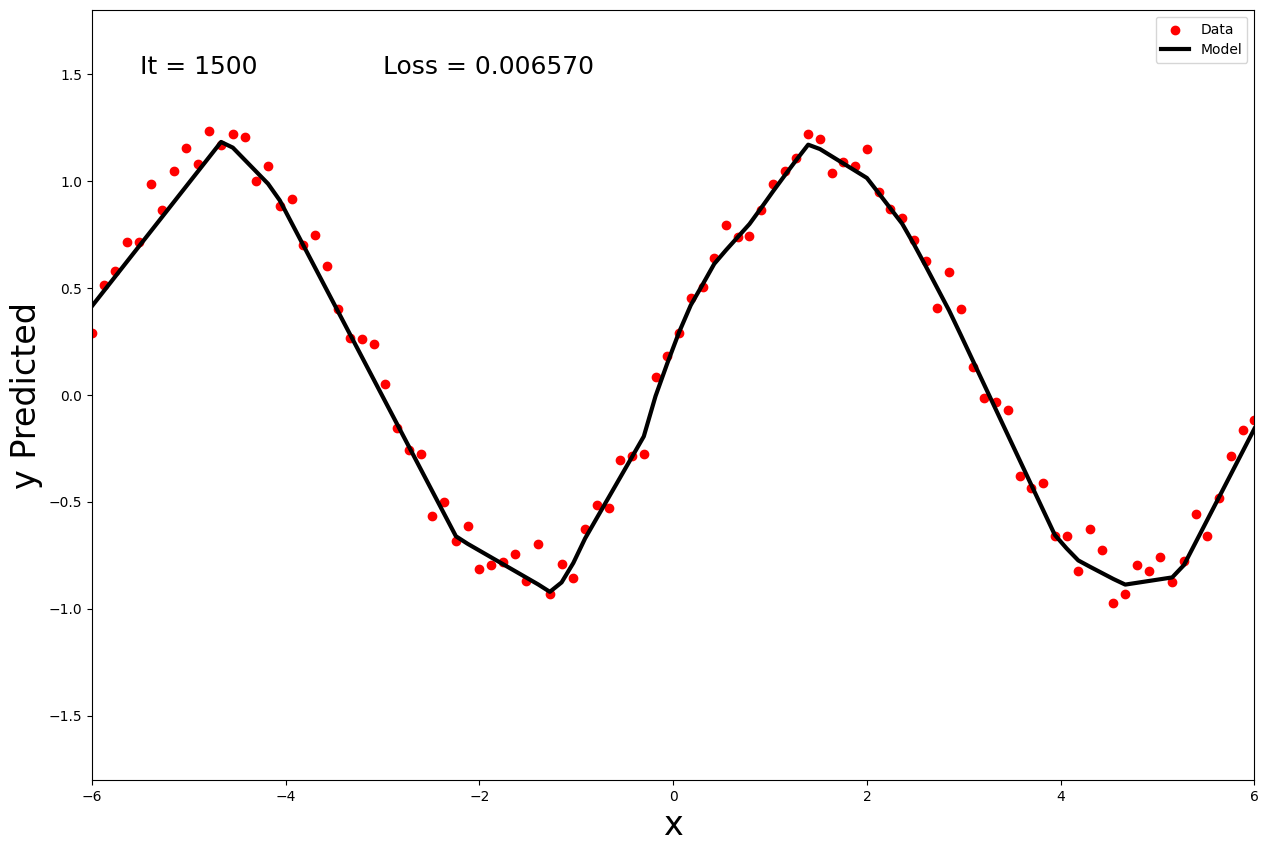

In [53]:
# ============================================================
# Neural Network Regression: Fit y = sin(x) + noise
# ============================================================

import torch
import numpy as np
import matplotlib.pyplot as plt
import imageio

# ------------------------------------------------------------
# Define the regression network
# ------------------------------------------------------------

# A simple feed-forward network:
# Input (1 feature) → Hidden layer (100 neurons) → Output (1 value)
# LeakyReLU helps avoid "dead neurons" compared to ReLU in some cases.

Net = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(100, 1)
)

# ------------------------------------------------------------
# Optimization + Loss
# ------------------------------------------------------------

# Adam optimizer adapts learning rates per-parameter.
optimizer = torch.optim.Adam(Net.parameters(), lr=0.01)

# Mean Squared Error for regression:
# MSE(y_pred, y_true) = mean((y_pred - y_true)^2)
loss_function = torch.nn.MSELoss()

# ------------------------------------------------------------
# Training settings
# ------------------------------------------------------------

image_list = []      # will store frames for GIF animation
Niter = 1501         # 1500 iterations + initial step

# Create a figure once; we update it every iteration
fig, ax = plt.subplots(figsize=(15, 10))

# ------------------------------------------------------------
# Training loop
# ------------------------------------------------------------

for it in range(Niter):

    # Forward pass: compute network prediction
    y_pred = Net(x)

    # Compute loss
    # Convention: loss(prediction, target)
    loss = loss_function(y_pred, y)

    # Backward pass preparation:
    # IMPORTANT: gradients accumulate by default, so we reset them each iteration
    optimizer.zero_grad()

    # Backpropagation: compute gradients of loss w.r.t. parameters
    loss.backward()

    # Parameter update step
    optimizer.step()

    # Print progress every 50 iterations (use loss.item() for a Python float)
    if it % 50 == 0:
        print(f"Iteration: {it} | Loss: {loss.item():.6f}")

    # --------------------------------------------------------
    # Visualization (animate training)
    # --------------------------------------------------------

    # Clear axes (preferred over plt.cla() when you are using ax)
    ax.clear()

    ax.set_xlabel("x", fontsize=24)
    ax.set_ylabel("y Predicted", fontsize=24)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1.8, 1.8)

    # Plot original noisy data
    ax.scatter(x_plot, y_plot, color="red", label="Data")

    # Plot model prediction
    # detach() breaks graph connection; numpy() converts to NumPy safely
    ax.plot(x_plot, y_pred.detach().numpy(), "k-", lw=3, label="Model")

    # Display iteration + loss on plot
    ax.text(-5.5, 1.5, f"It = {it}", fontsize=18, color="black")
    ax.text(-3.0, 1.5, f"Loss = {loss.item():.6f}", fontsize=18, color="black")

    ax.legend()

    # Draw the updated figure and capture it as an image array
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    image_list.append(image)


# ------------------------------------------------------------
# Save animation to GIF
# ------------------------------------------------------------

# fps=20 means 20 frames per second (faster animation)
imageio.mimsave("Sin_Regression_2.gif", image_list, fps=20)

### Customizing Function

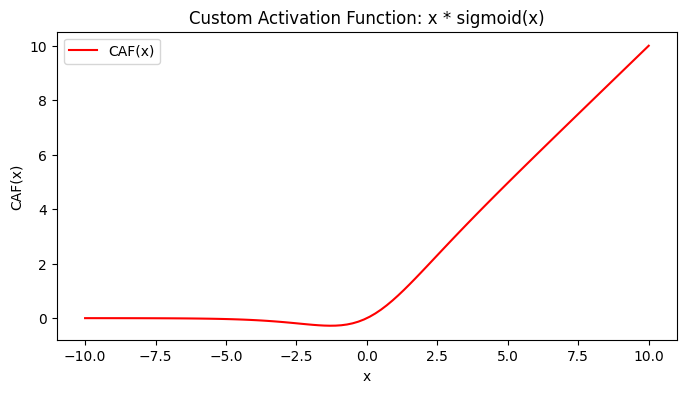

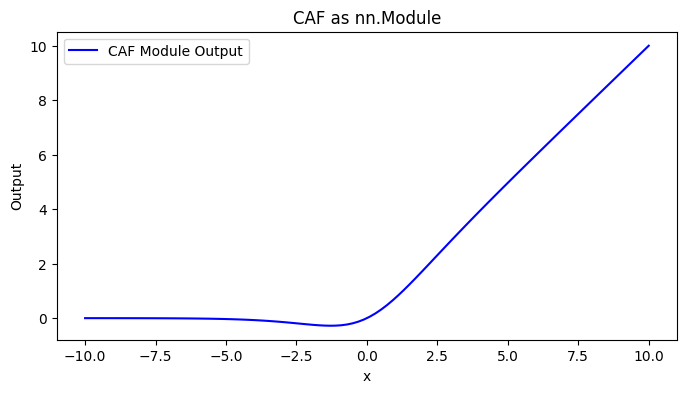

In [90]:
# ============================================================
# Custom Activation Function Example
# CAF(x) = x * sigmoid(x)
# ============================================================

import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# ------------------------------------------------------------
# Define Custom Activation Function (Functional Form)
# ------------------------------------------------------------

# CAF(x) = x * sigmoid(x)
#
# Recall:
# sigmoid(x) = 1 / (1 + exp(-x))
#
# This is similar to the SiLU / Swish activation:
# SiLU(x) = x * sigmoid(x)
#
# It is smooth and non-linear, unlike ReLU.

def caf(x):
    return x * (1.0 / (1.0 + torch.exp(-x)))


# ------------------------------------------------------------
# Generate Input Data
# ------------------------------------------------------------

# Create 100 points between -10 and 10
# view((-1,1)) reshapes tensor into column format (100,1)

x = torch.linspace(-10, 10, 100).view((-1, 1))

# Apply activation function
y = caf(x)

# Plot activation curve
plt.figure(figsize=(8,4))
plt.plot(x.numpy(), y.numpy(), "-r", label="CAF(x)")
plt.title("Custom Activation Function: x * sigmoid(x)")
plt.xlabel("x")
plt.ylabel("CAF(x)")
plt.legend()
plt.show()


# ------------------------------------------------------------
# Define Custom Activation as nn.Module
# ------------------------------------------------------------

# To use this inside neural networks,
# we wrap it inside a subclass of nn.Module.

class CAF(nn.Module):

    def __init__(self):
        super().__init__()   # initialize parent class

    def forward(self, x):
        # forward defines the computation
        return caf(x)


# Instantiate custom activation
custom_af = CAF()


# ------------------------------------------------------------
# Use Custom Activation Inside a Neural Network
# ------------------------------------------------------------

Net = nn.Sequential(
    CAF()   # our custom activation layer
)

# Pass input through network
y_net = Net(x)


# Plot output from module-based activation
plt.figure(figsize=(8,4))
plt.plot(x.numpy(), y_net.detach().numpy(), "-b", label="CAF Module Output")
plt.title("CAF as nn.Module")
plt.xlabel("x")
plt.ylabel("Output")
plt.legend()
plt.show()

# Learnable Custom Activation Function (CAF)

Name: Linear-1.weight
Shape: torch.Size([100, 1])
Name: Linear-1.bias
Shape: torch.Size([100])
Name: Customized AF.a
Shape: torch.Size([1])
Name: Linear-2.weight
Shape: torch.Size([1, 100])
Name: Linear-2.bias
Shape: torch.Size([1])


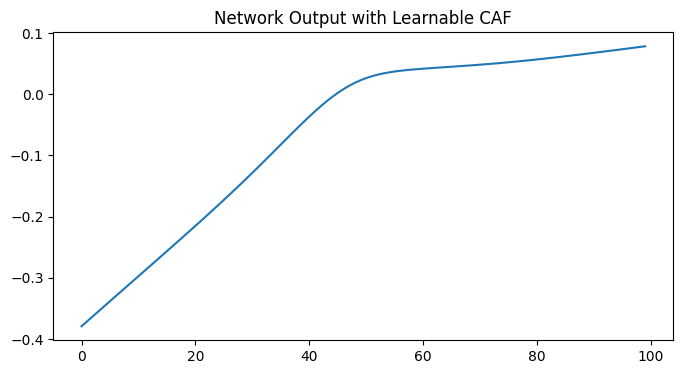

In [58]:
# ============================================================
# Learnable Custom Activation Function (CAF)
# ============================================================

from torchsummary import summary
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# ------------------------------------------------------------
# Custom Activation with Learnable Parameter
# ------------------------------------------------------------

class CAF(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Learnable scaling parameter 'a'
        # nn.Parameter tells PyTorch:
        # "This tensor should be optimized during training."
        #
        # Initial value = 0.1
        self.a = nn.Parameter(torch.tensor([0.1]), requires_grad=True)
        
        # Constant (not trainable)
        self.N = 10.0

    def forward(self, x):
        # Forward pass of custom activation
        # CAF(x) = a * caf(x)
        # where caf(x) = x * sigmoid(x)
        return self.a * caf(x)


# Instantiate custom activation
custom_af = CAF()


# ------------------------------------------------------------
# Define Neural Network Using Custom Activation
# ------------------------------------------------------------

Net = nn.Sequential()

# First linear layer: 1 input feature → 100 hidden units
Net.add_module("Linear-1", nn.Linear(1, 100))

# Insert our custom activation
Net.add_module("Customized AF", CAF())

# Final linear layer: 100 → 1 output
Net.add_module("Linear-2", nn.Linear(100, 1))


# Forward pass through the network
y = Net(x)


# ------------------------------------------------------------
# Inspect Trainable Parameters
# ------------------------------------------------------------

# named_parameters() returns:
# (parameter_name, parameter_tensor)

for name, params in Net.named_parameters():
    if params.requires_grad:
        print(f"Name: {name}")
        print(f"Shape: {params.size()}")


# ------------------------------------------------------------
# Plot Network Output
# ------------------------------------------------------------

# detach() removes tensor from computation graph
# numpy() converts it to NumPy for plotting

plt.figure(figsize=(8,4))
plt.plot(y.detach().numpy())
plt.title("Network Output with Learnable CAF")
plt.show()